# A Flavor of Nonlinearity

Are nonlinearities a nuisance or blessing? We will get into the topic with an image filtering example. 

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import scipy.signal as ss

from src.utils.io import load_image
from src.utils.plotting import show_grayscale_img


C:\Users\sophi\.julia\conda\3\envs\nsp2021\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\sophi\.julia\conda\3\envs\nsp2021\lib\site-packages\torchaudio\backend\utils.py:89: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


First, let's take a look at our original image. (Photo by Mateja Lemic from Pexels)

Our image format is 640 x 425.


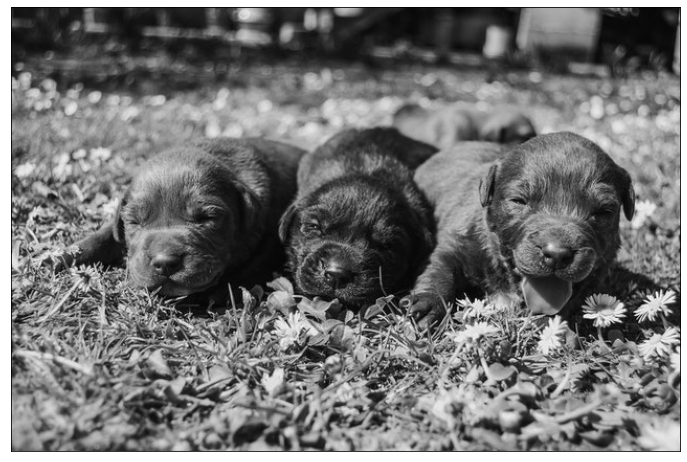

In [2]:
img = load_image("../../data/img/puppies.png")

height, width = img.shape
print(f'Our image format is {width} x {height}.')

show_grayscale_img(img)

Now, we'll corrupt the image with some salt and pepper noise. To do so, we simply pick a fraction `p_noise` of the
pixels uniformly at random and make them either black or white with a probability of 0.5.

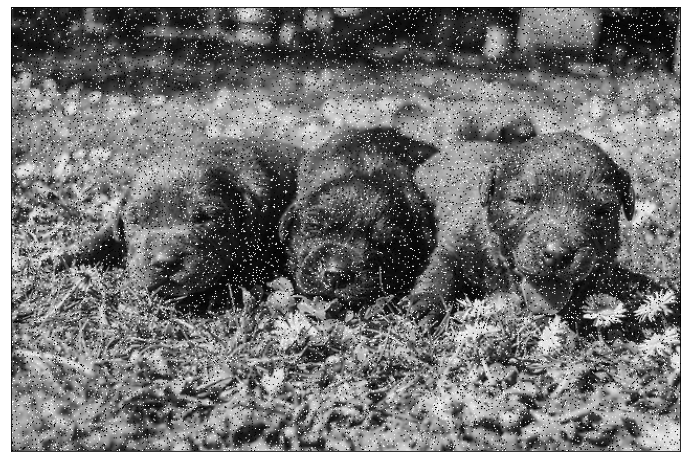

In [3]:
p_noise = 0.1 # fraction of individual pixel to be corrupted
num_corrupted = int(height * width * p_noise) # number of corrupted pixels

rng = np.random.default_rng()
x_idc = rng.integers(0, width, size=num_corrupted)
y_idc = rng.integers(0, height, size=num_corrupted)
noise = rng.binomial(1, 0.5, num_corrupted)

corrupted_img = np.array(img)
corrupted_img[y_idc, x_idc] = 255 * noise

show_grayscale_img(corrupted_img)

Now, let's do a linear thing: we apply a mean filter! (Fortunately, it's just linearly mean^^). First, we define a
certain quadratic neighborhood of size `k` (the filter kernel size), and then we assign each pixel in the filtered
image the mean value of its surrounding neighborhood from the corrupted image. You surely have noticed that the edge
pixels don't have a complete neighborhood. In this case we simply pad the image with zeros to avoid this issue.

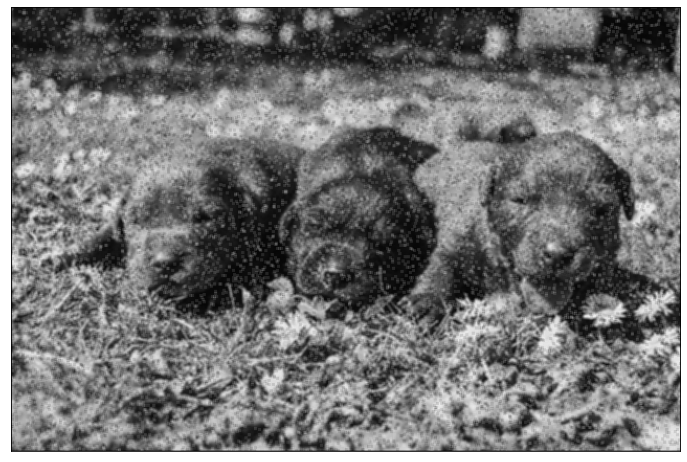

In [4]:
k = 3 # the neighborhood size, should be an odd number of pixels

# create a zero-padded image
padding = int((k-1)/2)
padded_img = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
padded_img[padding:padding+height,padding:padding+width] = corrupted_img

# apply the mean filter
mean_kernel = np.ones((k,k)) / k**2 
padded_img = padded_img.astype(float)
filtered_img = ss.convolve(padded_img, mean_kernel, mode='valid').astype(np.uint8)

show_grayscale_img(filtered_img)

Now let's get nonlinear and compare this to a median filter! The procedure is the same as with mean filtering, except
that a filtered pixel is not the mean of its neighborhood but the median. (Zero-padding ist done automatically by scipy
this time.)

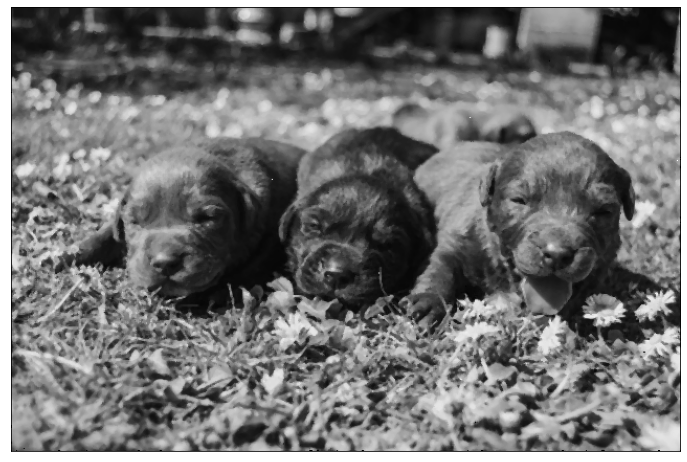

In [5]:
k = 3 # the neighborhood size, should be an odd number of pixels

# apply median filter
filtered_img = ss.medfilt2d(corrupted_img, kernel_size=k)

show_grayscale_img(filtered_img)